In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
with open('week_1-ex_1.txt') as f:
    lines = f.readlines()
train_x=[]
train_y=[]
test_x=[]
test_y=[]
c=0
for i in lines:
    s=i.split(',')
    s[0]=float(s[0])
    s[1]=s[1].replace('\n','')
    s[1]=float(s[1])
    if c<97*0.8:
        train_x.append(s[0])
        train_y.append(s[1])
    else:
        test_x.append(s[0])
        test_y.append(s[1])
    c+=1

In [53]:
train_x=np.array(train_x)
train_y=np.array(train_y)
test_x=np.array(test_x)
test_y=np.array(test_y)
print(len(train_x))
print(len(train_y))
print(len(test_x))
print(len(test_y))

78
78
19
19


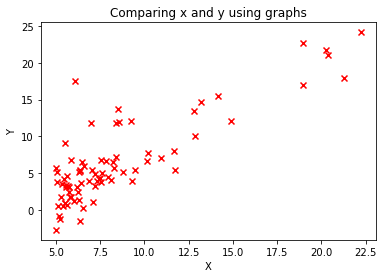

In [54]:
plt.scatter(train_x,train_y,marker='x',c='r')
plt.title("Comparing x and y using graphs")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [55]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    for i in range(m):
        f=w*x[i]+b
        total_cost+=(f-y[i])**2
    total_cost=(1/(2*m))*total_cost
    return total_cost


In [56]:
initial_w = 2
initial_b = 1

cost = compute_cost(train_x, train_y, initial_w, initial_b)
print("Cost is :",cost)

Cost is : 75.25472275749166


In [57]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f=w*x[i]+b
        db=f-y[i]
        dw=(f-y[i])*x[i]
        dj_dw+=dw
        dj_db+=db
    dj_db=dj_db*(1/m)
    dj_dw=dj_dw*(1/m)
    return dj_dw,dj_db

In [58]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(train_x, train_y, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -74.34834633757691 -6.451910384615381


In [59]:
def gradient_descent(x, y, w, b, cost_function, gradient_function, alpha, num_iters): 
    m=x.shape[0]
    J_history=[]
    w_history=[]
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=cost_function(x,y,w,b)
        J_history.append(cost)
        w_history.append(w)
        if i%200==0:
            print("Cost for",i,"iteration is :",cost)
    return w,b,J_history,w_history

In [60]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,jlist,wlist = gradient_descent(train_x,train_y, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)

Cost for 0 iteration is : 6.4910649135495975
Cost for 200 iteration is : 5.41509927579328
Cost for 400 iteration is : 5.1047744899407945
Cost for 600 iteration is : 4.960229948515017
Cost for 800 iteration is : 4.89290331071974
Cost for 1000 iteration is : 4.861543592032991
Cost for 1200 iteration is : 4.846936714453542
Cost for 1400 iteration is : 4.840133054167161


In [61]:
m=train_x.shape[0]
predicted=np.zeros(m)
for i in range(m):
    predicted[i]=w*train_x[i]+b

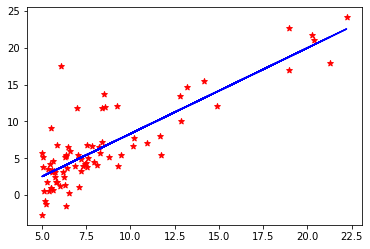

In [62]:
plt.plot(train_x,predicted,c='b')
plt.scatter(train_x,train_y,marker='*',c='r')